In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.io import imread
from scipy.fftpack import ifftn, fft2, ifft2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmath
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')
import random

In [2]:
imgPenguin=np.array(cv2.imread('./class11/imgs/fish_000000009598_05281.png'))[:, :, ::-1]
imgPenguinMask=np.array(cv2.imread('./class11/imgs/mask_000000009598_05281.png'))[:, :, ::-1]
imgHiking = np.array(cv2.imread('./bg3.png'))[:, :, ::-1]
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

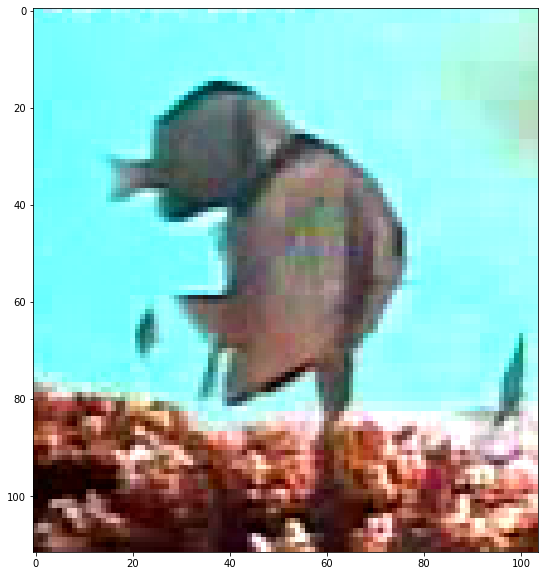

In [3]:
imgPenguin=np.array(cv2.imread('./class11/imgs/fish_000000009598_05281.png'))[:, :, ::-1]
imgPenguinMask=np.array(cv2.imread('./class11/imgs/mask_000000009598_05281.png'))[:, :, ::-1]
imgHiking = np.array(cv2.imread('./bg3.png'))[:, :, ::-1]
plt.figure(figsize=(10,10))
# plt.subplot(2,2,1)

plt.imshow(imgPenguin)
plt.savefig(r'D:\Python_first\水下物体检测\相关实验/test3.jpg', )
# plt.subplot(2,2,2)
# plt.imshow(imgPenguinMask)
# plt.subplot(2,2,3)
# plt.imshow(imgHiking)

# plt.show()

In [4]:
imgHiking = cv2.resize(imgHiking, (400, 300))

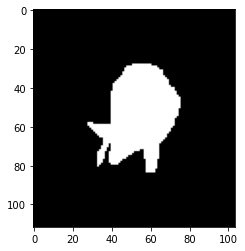

In [5]:
ratio = 1
height = imgPenguinMask.shape[0]
length = imgPenguinMask.shape[1]
imgPenguinMask = cv2.resize(imgPenguinMask, (int(length*ratio), int(height*ratio)))
top = (height-int(height*ratio)) // 2
bottom = height-int(height*ratio) - top
left = (length - int(length*ratio)) // 2
right = length - int(length*ratio) - left

imgPenguinMask = cv2.copyMakeBorder(imgPenguinMask, top, bottom, left, right, cv2.BORDER_CONSTANT,value=[0,0,0])
plt.imshow(imgPenguinMask)
plt.show()

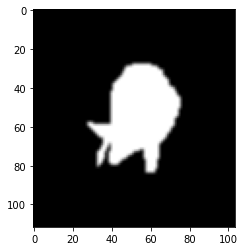

In [6]:
imgPenguinMask=cv2.GaussianBlur(imgPenguinMask, (3, 3), -1)
plt.imshow(imgPenguinMask)
plt.show()

In [20]:
imgPenguinMaskNorm = imgPenguinMask.astype(np.float) / imgPenguinMask.max()
outputImage = imgHiking.copy()
targetTop = 0
targetLeft=100
outputImage[targetTop:targetTop+imgPenguin.shape[0], targetLeft:targetLeft+imgPenguin.shape[1]] = imgPenguinMaskNorm * imgPenguin + (1 - imgPenguinMaskNorm) * outputImage[targetTop:targetTop+imgPenguin.shape[0], targetLeft:targetLeft+imgPenguin.shape[1]]

In [21]:
300-imgPenguin.shape[0]

188

In [22]:
targetTop = random.randint(0, 300-imgPenguin.shape[0])
targetLeft = random.randint(0, 400-imgPenguin.shape[1])

outputImage[targetTop:targetTop+imgPenguin.shape[0], targetLeft:targetLeft+imgPenguin.shape[1]] = imgPenguinMaskNorm * imgPenguin + (1 - imgPenguinMaskNorm) * outputImage[targetTop:targetTop+imgPenguin.shape[0], targetLeft:targetLeft+imgPenguin.shape[1]]

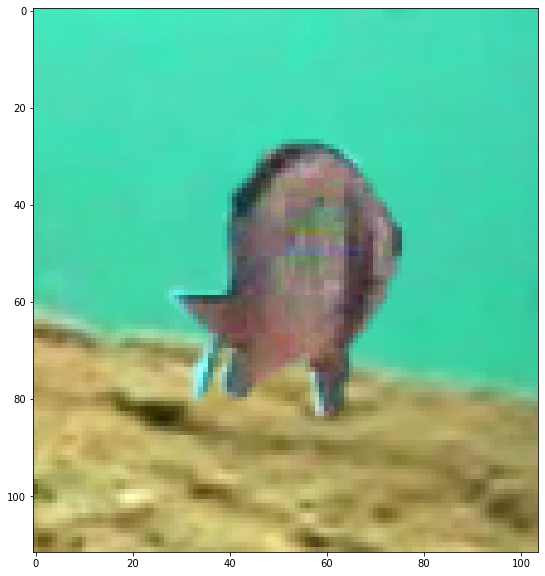

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(outputImage[targetTop:targetTop+imgPenguin.shape[0], targetLeft:targetLeft+imgPenguin.shape[1]])
plt.savefig(r'D:\Python_first\水下物体检测\相关实验/test4.jpg', )
plt.show()

In [24]:
imgHiking.shape

(300, 400, 3)

In [25]:
plt.savefig(r'D:\Python_first\水下物体检测\相关实验/test1.jpg', )

<Figure size 432x288 with 0 Axes>